In [1]:
import urllib.request
import spacy
import re
nlp = spacy.load('en')
from textblob import TextBlob 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
# from gensim.models import Word2Vec
   
# ps = PorterStemmer()

import os
from google.colab import drive

import seaborn as sns

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer 
from collections import Counter
from nltk import bigrams

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
path = os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data Mining/Group Project')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import requests
import bs4

transcript_1_candidates = ['Bernie Sanders', 'Elizabeth Warren', 'Joe Biden', 'Pete Buttigieg', 'Amy Klobuchar', 'Andrew Yang', 'Tom Steyer']
URL_1 = "https://www.rev.com/blog/transcripts/new-hampshire-democratic-debate-transcript"

requests.get(URL_1, {}).text
web_page = bs4.BeautifulSoup(requests.get(URL_1, {}).text, "lxml")
transcript_1 = web_page.body.find_all(name="p")

transcript_2_candidates = ['Bernie Sanders', 'Elizabeth Warren', 'Joe Biden', 'Pete Buttigieg', 'Amy Klobuchar', 'Michael Bloomberg']
URL_2 = "https://www.rev.com/blog/transcripts/democratic-debate-transcript-las-vegas-nevada-debate"

requests.get(URL_2, {}).text
web_page = bs4.BeautifulSoup(requests.get(URL_2, {}).text, "lxml")
transcript_2 = web_page.body.find_all(name="p")

# transcript = pd.DataFrame(transcript, columns=['text'])

In [0]:
# debate = 'https://raw.githubusercontent.com/shahpranavpks/Twitter_Politics/master/Data%20Collection/public_database.csv?token=ADC6S4ONWZ4DWLWGSQ5BPOS6QVUTG'
# file_arr = []
# for line in urllib.request.urlopen(debate):
#   file_arr.append(line.decode('utf-8').split(','))

text = gather_text_from_tweets(file_arr)
text = clean_txt(text)

In [0]:
def gather_text_from_tweets(file):
  text = []
  tweet = ""
  for line_arr in file[1:]:
    if len(line_arr) < 8:
      tweet = tweet + " " + " ".join(line_arr)
    else:
      if tweet != "":
        text.append(tweet)

      tweet = " ".join(line_arr[7:])
  return text

def clean_txt(text):
  new_text = []
  for tweet in text:
    new_tweet = []
    tweet = tweet.replace('&lt;', ' ')
    tweet_arr = ' '.join(re.sub("@|([^0-9A-Za-z_\'\. \t \&lt;])|(\w+:\/\/\S+)", " ", tweet).split()).lower()
    for word in tweet_arr.split():
      new_tweet.append(ps.stem(word))
      
    new_text.append(new_tweet)
  return new_text

In [0]:
sanders = ["bernie", "sanders", "bern"]
warren = ["elizabeth", "warren"]
biden = ["joe", "biden"]
buttigieg = ["pete", "buttigieg"]
klobuchar = ["amy", "klobuchar"]
bloomberg = ["mike", "bloomberg"]
yang = ["andrew", "yang"]
steyer = ["tom", "steyer"]
trump = ["donald", "trump", "president", "potus"]
candidates = [sanders, warren, biden, buttigieg, klobuchar, bloomberg, yang, steyer, trump]
candidate_last_names = ['sanders', 'warren', 'biden', 'buttigieg', 'klobuchar', 'bloomberg', 'yang', 'steyer', 'trump']


def get_transcript_cand_index(name, trans_1=True):
  if trans_1 == False:
    last_names = {'Bernie Sanders':0, 'Elizabeth Warren':1, 'Joe Biden':2,
                  'Pete Buttigieg':3, 'Amy Klobuchar':4, 'Michael Bloomberg':5}
  else:
    last_names = {'Bernie Sanders':0, 'Elizabeth Warren':1, 'Joe Biden':2,
                  'Pete Buttigieg':3, 'Amy Klobuchar':4, 'Andrew Yang':5, 'Tom Steyer':6}
  return last_names[name]


def get_cand_index(tweet):
  word_set = set(tweet)
  cand_index = 0
  for i in range(len(candidates)):
    for word in candidates[i]:
      if word in tweet.lower():
        if cand_index == 0: cand_index = i + 1
        elif cand_index != i + 1: return -1 # more than one candidate mentioned

  return cand_index

In [0]:
def run_sent_transcript(transcript, transcript_candidates, trans1=True):
  cand_sents = []
  cand_subj = []
  # Remove links to video
  for i in range(len(transcript)):
    transcript[i] = re.sub(r"\(<a .*</a>\)<br/>", '', transcript[i].text)
    for cand in transcript_candidates:
      curr_cand = None
      if transcript[i][:len(cand)] == cand:
        curr_cand = cand
        if transcript[i][len(cand) + 8] == ')':
          text = transcript[i][len(cand) + 10:]
          break
        elif transcript[i][len(cand) + 9] == ')':
          text = transcript[i][len(cand) + 11:]
          break
        elif transcript[i][len(cand) + 11] == ')':
          text = transcript[i][len(cand) + 13:]
          break
        elif transcript[i][len(cand) + 12] == ')':
          text = transcript[i][len(cand) + 14:]
          break
        else:
          print(transcript[i])
    if curr_cand:
      ind = get_transcript_cand_index(curr_cand, trans1)
      sentiment = TextBlob(text).sentiment
      cand_sents.append([ind, sentiment.polarity])
      cand_subj.append([ind, sentiment.subjectivity])
    # else: print(transcript[i])
  return cand_sents, cand_subj

In [0]:
# id,created_at,author,likes,followers_count,place,search_term,text
def run_sent(text):
  cand_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  cand_sents = []
  cand_subj = []
  for tweet_arr in text:
    tweet_txt = ' '.join(tweet_arr)
    ind = get_cand_index(tweet_txt)
    cand_counts[ind + 1] += 1

    sentiment = TextBlob(tweet_txt).sentiment
    cand_sents.append([(ind + 1), sentiment.polarity])
    cand_subj.append([(ind + 1), sentiment.subjectivity])
  
  return cand_counts, cand_sents, cand_subj, dim_cand_sents

In [0]:
def scatter_plot(arr, plt_title, y_label, participants=None, titles=None):
  if titles is None:
    titles = ['Sanders', 'Warren', 'Biden', 'Buttigieg', 'Klobuchar', 'Bloomberg', 'Yang', 'Steyer', 'Trump']
  x = [i[0] for i in arr]
  y = [i[1] for i in arr]

  fig, ax = plt.subplots(figsize=(12, 8))
  if participants:
    x_participants = []
    y_participants = []
    x_non = []
    y_non = []
    for i in range(len(x)):
      if titles[int(x[i])] in participants: 
        x_participants.append(x[i])
        y_participants.append(y[i])
      else: 
        x_non.append(x[i])
        y_non.append(y[i])
    ax.scatter(x_participants, y_participants, c='b', label="Participants")
    ax.scatter(x_non, y_non, c='r', label="Non Participants")
    ax.legend()
  else:
    ax.scatter(x, y)
  plt.xticks(ticks=np.arange(len(titles)), labels=titles)
  plt.title(plt_title)
  plt.ylabel(y_label)
  plt.show()

In [0]:
def lloyds(data, num_cands, plt_title, y_label, participants, titles=None):
  clusters = [0] * len(data)
  S = np.array([])
  initial_S = [[i, 0] for i in range(num_cands)]
  new_S = initial_S.copy()
  num_iters = 0
  while not np.array_equal(S, new_S) and num_iters < 25:
    S = new_S.copy()
    for i in range(len(data)):
      min_dist = 999999
      for j in range(len(S)):
        dist = np.linalg.norm(np.array(data[i]) - S[j])
        if dist < min_dist:
          min_dist = dist
          clusters[i] = j
    
    for i in range(len(S)):
      pts = [data[j] for j in range(len(data)) if clusters[j] == i]
      new_S[i] = np.average(np.array(pts), axis=0)
    
    num_iters += 1

  scatter_plot(new_S, plt_title, y_label, participants, titles)
  return clusters, new_S

## Debate 1

In [103]:
# print([titles[i] + ': ' + str(cand_counts[i]) for i in range(len(cand_counts))])
participants = ['Sanders', 'Warren', 'Biden', 'Buttigieg', 'Klobuchar', 'Yang', 'Steyer']
print('Participants: ' + ', '.join(participants))
print('Non Participants: Bloomberg, Trump')

Participants: Sanders, Warren, Biden, Buttigieg, Klobuchar, Yang, Steyer
Non Participants: Bloomberg, Trump


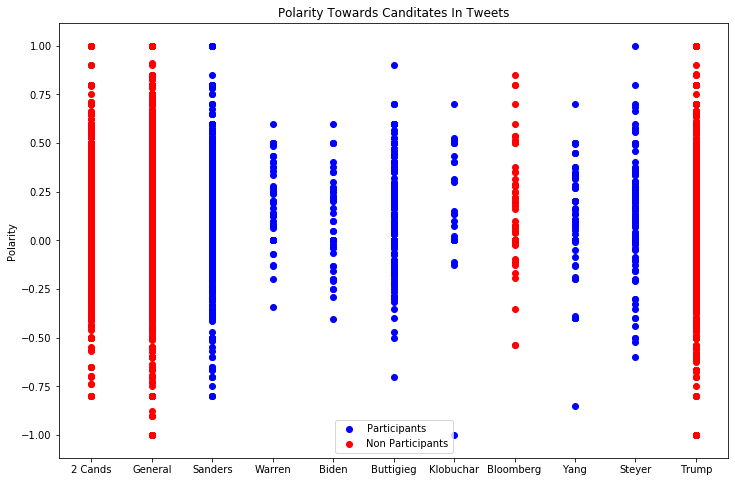

In [0]:
scatter_plot(cand_sents, 'Polarity Towards Candidates In Tweets', 'Polarity', participants)

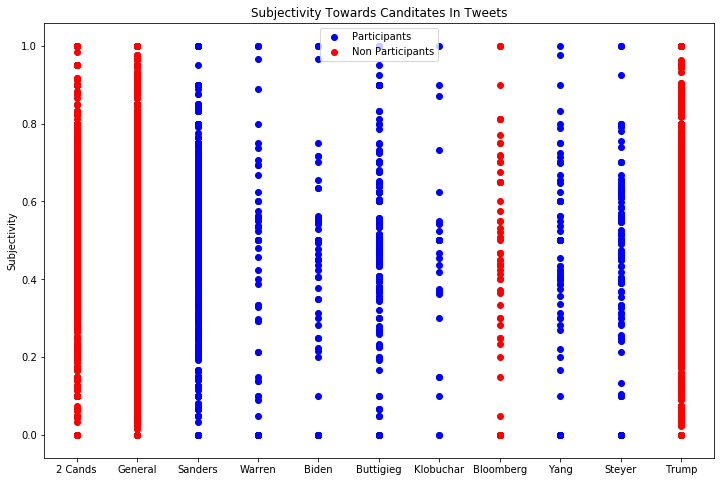

In [0]:
scatter_plot(cand_subj, 'Subjectivity Towards Candidates In Tweets', 'Subjectivity', participants)

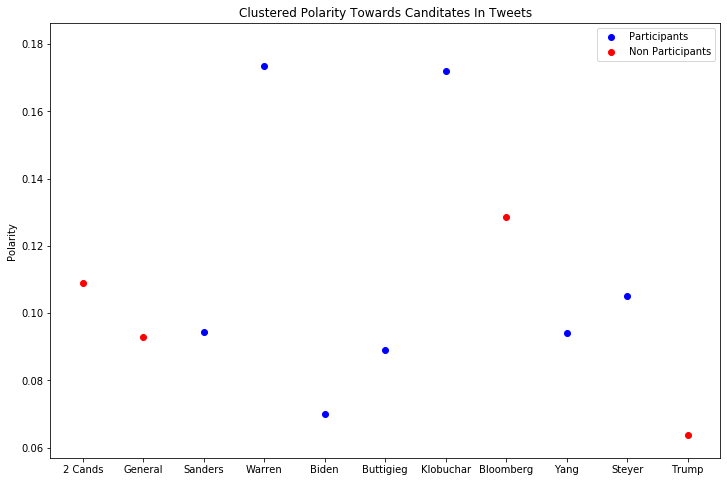

In [0]:
clusters, sent_clusters = lloyds(cand_sents, len(cand_counts), 'Clustered Polarity Towards Candidates In Tweets', 'Polarity', participants)

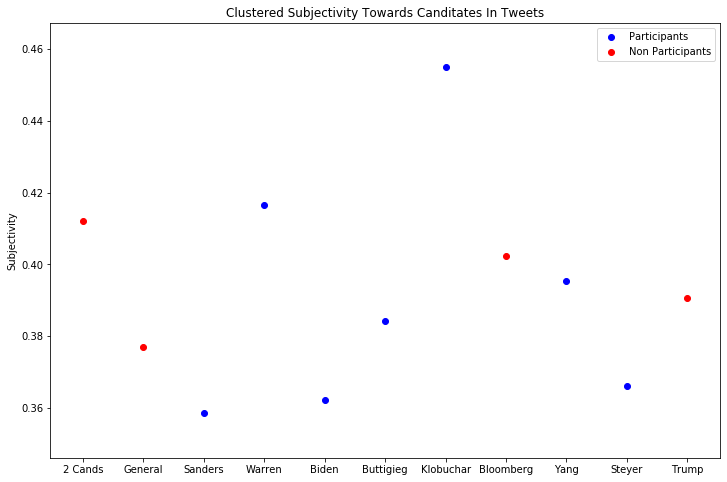

In [0]:
clusters, sent_clusters = lloyds(cand_subj, len(cand_counts), 'Clustered Subjectivity Towards Candidates In Tweets', 'Subjectivity', participants)

### Transcript

In [0]:
deb1_cand_sents, deb1_cand_subj = run_sent_transcript(transcript_1, transcript_1_candidates)

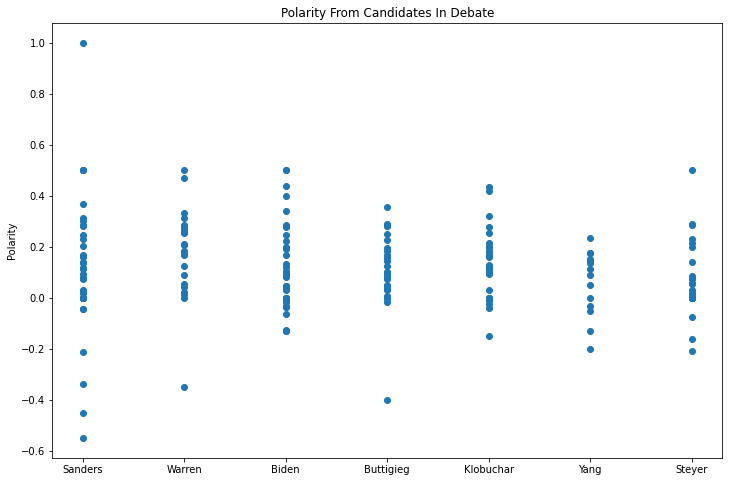

In [105]:
scatter_plot(deb1_cand_sents, 'Polarity From Candidates In Debate', 'Polarity', participants=None, titles=participants)

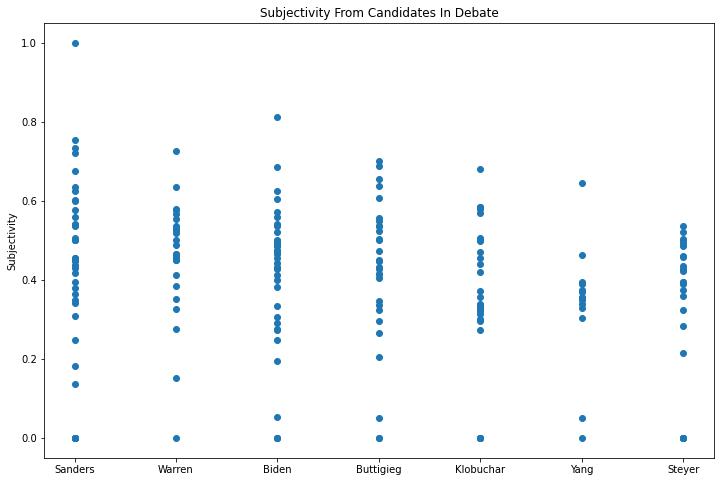

In [107]:
scatter_plot(deb1_cand_subj, 'Subjectivity From Candidates In Debate', 'Subjectivity', participants=None, titles=participants)

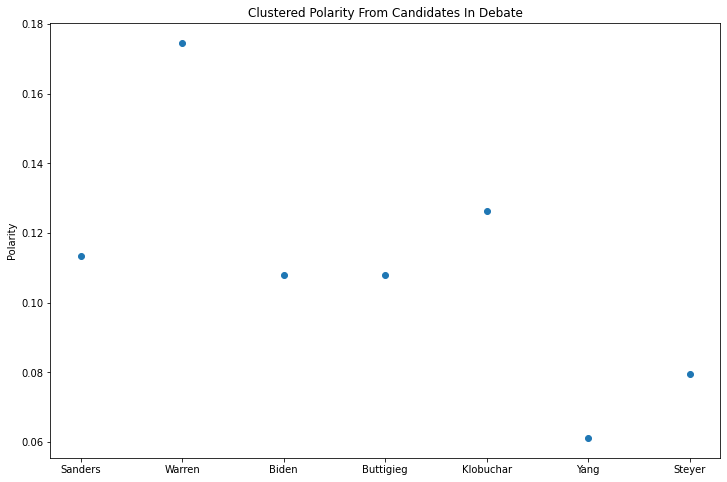

In [108]:
_ = lloyds(deb1_cand_sents, len(participants), 'Clustered Polarity From Candidates In Debate', 'Polarity', participants=None, titles=participants)

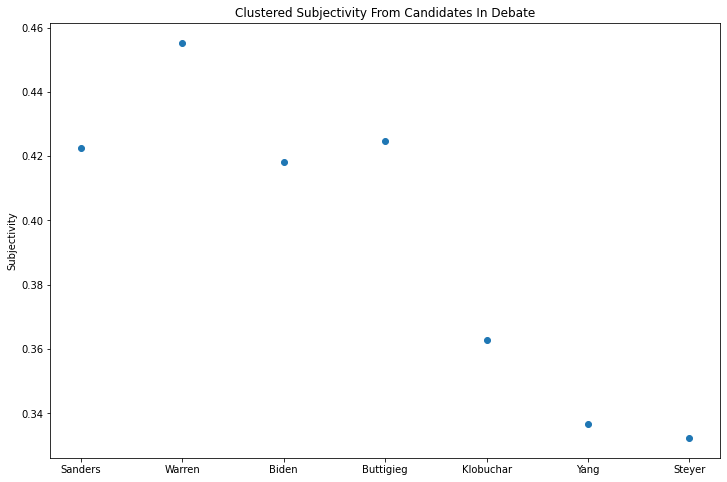

In [109]:
_ = lloyds(deb1_cand_subj, len(participants), 'Clustered Subjectivity From Candidates In Debate', 'Subjectivity', participants=None, titles=participants)

## Debate 2

In [110]:
# print([titles[i] + ': ' + str(cand_counts[i]) for i in range(len(cand_counts))])
participants = ['Sanders', 'Warren', 'Biden', 'Buttigieg', 'Klobuchar', 'Bloomberg']
print('Participants: ' + ', '.join(participants))
print('Non Participants: Yang, Steyer, Trump')

Participants: Sanders, Warren, Biden, Buttigieg, Klobuchar, Bloomberg
Non Participants: Yang, Steyer, Trump


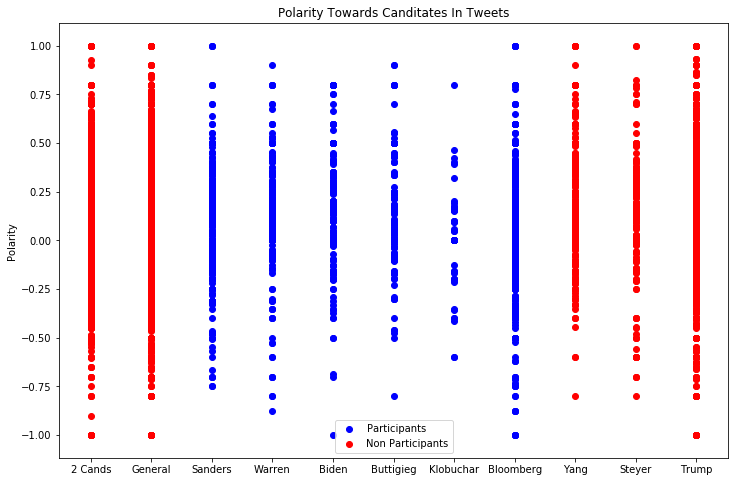

In [0]:
scatter_plot(cand_sents, 'Polarity Towards Canditates In Tweets', 'Polarity', participants)

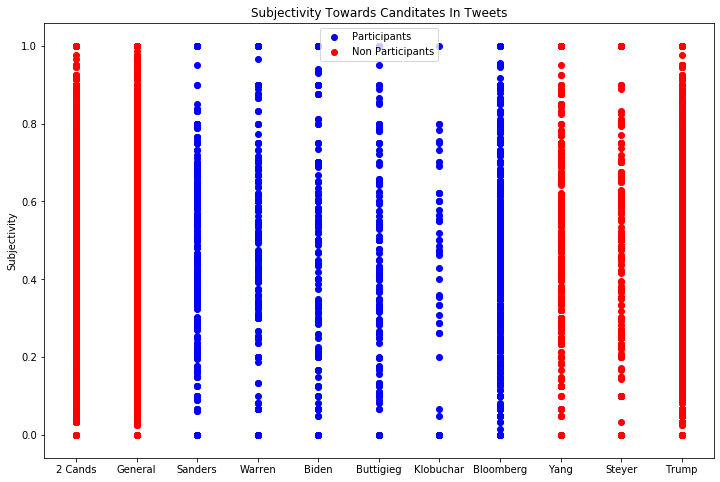

In [0]:
scatter_plot(cand_subj, 'Subjectivity Towards Canditates In Tweets', 'Subjectivity', participants)

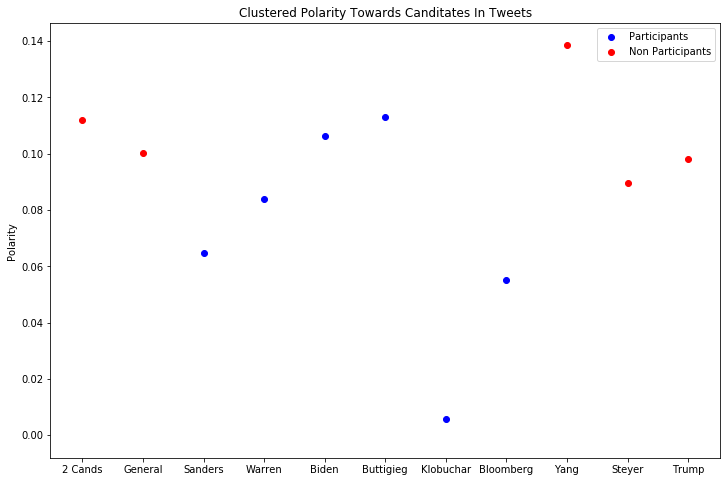

In [0]:
clusters, sent_clusters = lloyds(cand_sents, len(cand_counts), 'Clustered Polarity Towards Canditates In Tweets', 'Polarity', participants)

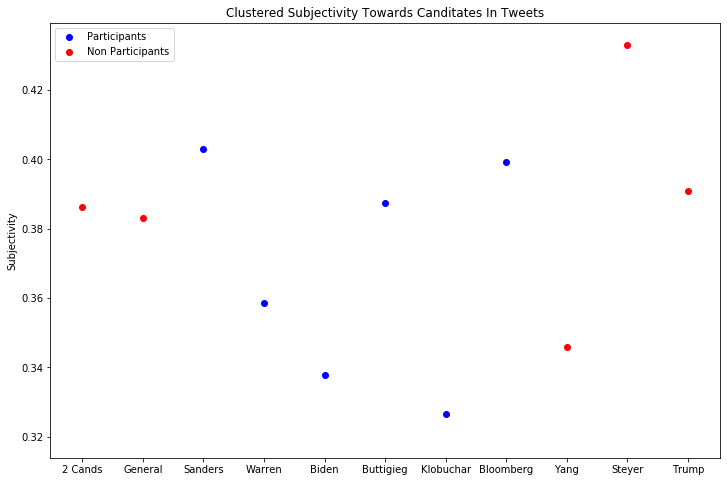

In [0]:
clusters, sent_clusters = lloyds(cand_subj, len(cand_counts), 'Clustered Subjectivity Towards Canditates In Tweets', 'Subjectivity', participants)

### Transcript

In [0]:
deb2_cand_sents, deb2_cand_subj = run_sent_transcript(transcript_2, transcript_2_candidates, trans1=False)

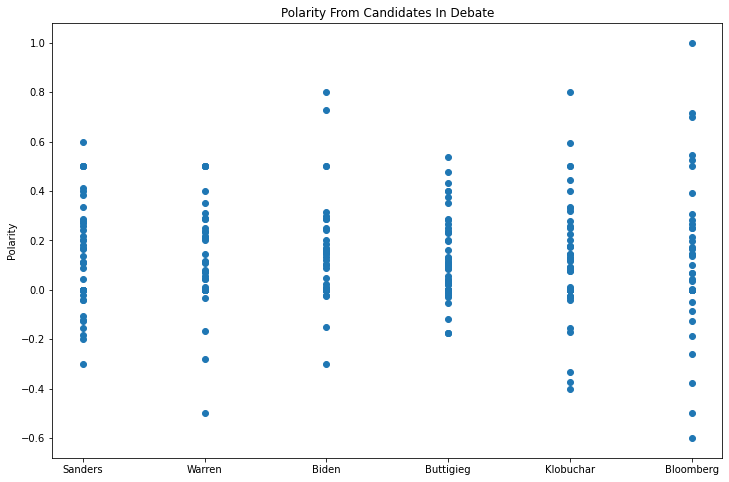

In [112]:
scatter_plot(deb2_cand_sents, 'Polarity From Candidates In Debate', 'Polarity', participants=None, titles=participants)

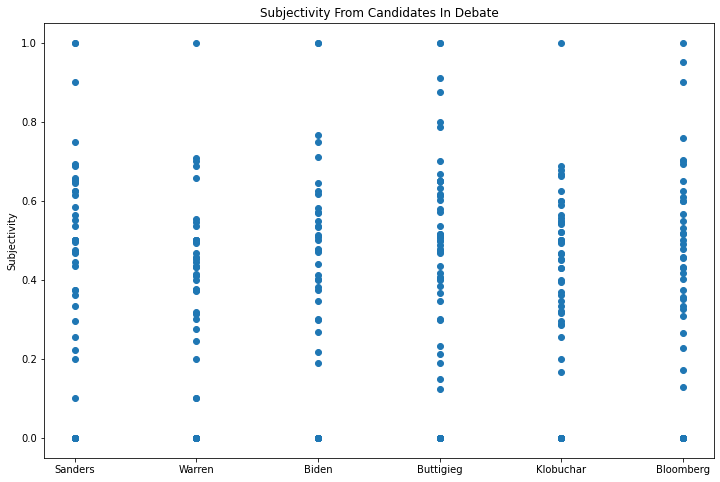

In [113]:
scatter_plot(deb2_cand_subj, 'Subjectivity From Candidates In Debate', 'Subjectivity', participants=None, titles=participants)

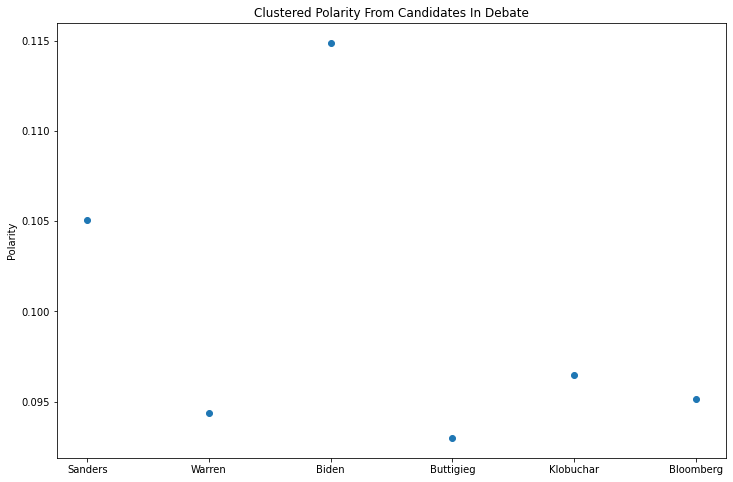

In [114]:
_ = lloyds(deb2_cand_sents, len(participants), 'Clustered Polarity From Candidates In Debate', 'Polarity', participants=None, titles=participants)

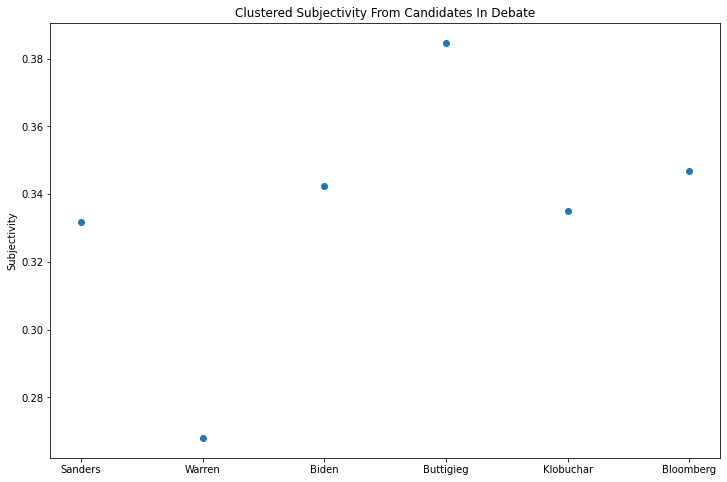

In [115]:
_ = lloyds(deb2_cand_subj, len(participants), 'Clustered Subjectivity From Candidates In Debate', 'Subjectivity', participants=None, titles=participants)



---



# Dimensionality Reduction

In [0]:
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation

def clean_txt(df, size): #prefer this method
    tweets_text = df['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True) # remove non-character word    
    clean_tweets = []
    for t in tweets_text: # loop through every tweets
        terms_stop = [re.sub(r"\d", "", term, flags=re.I) for term in WhitespaceTokenizer().tokenize(t) # remove term that contains number
                    if term.lower() 
                    not in stop
                    #and not term.isdigit()
                    and not term.startswith(('@','#','http','rt', 'via'))]     
        terms_stop = list(filter(None, terms_stop)) # remove empty/ non_character words        
        terms_stem = [PorterStemmer().stem(word) for word in terms_stop] 
        if len(terms_stop) > size: # only analyze long tweets          
          t=" ".join(terms_stop)
          #t=" ".join(terms_stop)        
          clean_tweets.append(t)
    return clean_tweets

def cand_data(df,cand_name):
    df['candidate'] = np.where(df['text'].str.contains(cand_name, flags=re.IGNORECASE,regex=True),'Filtered', '')
    df = df[df.candidate =='Filtered']
    return df['text']

In [0]:
def svd_func(df,word_in,top_sim):
  clean_tweets = clean_txt(df, 20) # only analyze length of more than 20 words 
  vectorizer= TfidfVectorizer()
  my_matrix = vectorizer.fit_transform([t for t in clean_tweets]).transpose() # words x documents(tweets)
  # print(my_matrix.shape)
  words_compressed, _, docs_compressed = svds(my_matrix, k=40) # most data stays in the first 10 dimension, choose 40 to be safe
  docs_compressed = docs_compressed.transpose()
  # print(words_compressed.shape)
  # print(docs_compressed.shape) 

  word_to_index = vectorizer.vocabulary_
  index_to_word = {i:t for t,i in word_to_index.items()}

  words_compressed = normalize(words_compressed, axis = 1) # PCA

  k= top_sim # number of most closest words
  if word_in not in word_to_index: return "Not in vocab."
  sims = words_compressed.dot(words_compressed[word_to_index[word_in],:]) # U x vector of the search word to find similarity
  asort = np.argsort(-sims)[:k+1] # sorting similarity from biggest to smallest, that's why there is a negative sign
  return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]] # return similar words, similarity

In [0]:
candidate_last_names = ['sanders', 'warren', 'biden', 'buttigieg', 'klobuchar', 'bloomberg', 'yang', 'steyer', 'trump']
def get_sim_words_polarity(df, num_sim_words=200):
  cand_sent = []

  for i in range(len(candidate_last_names)):
    sim_words = svd_func(df, candidate_last_names[i], num_sim_words)

    for word in sim_words:
      # if len(word) != 2:
      #   print(word)
      if len(word) == 2:
        sentiment = TextBlob(word[0]).sentiment
        cand_sent.append([i, sentiment.polarity])

  return cand_sent

## Debate 1

In [0]:
d1_participants = ['Sanders', 'Warren', 'Biden', 'Buttigieg', 'Klobuchar', 'Yang', 'Steyer']

200
200
200
200
200
200
200
200
200


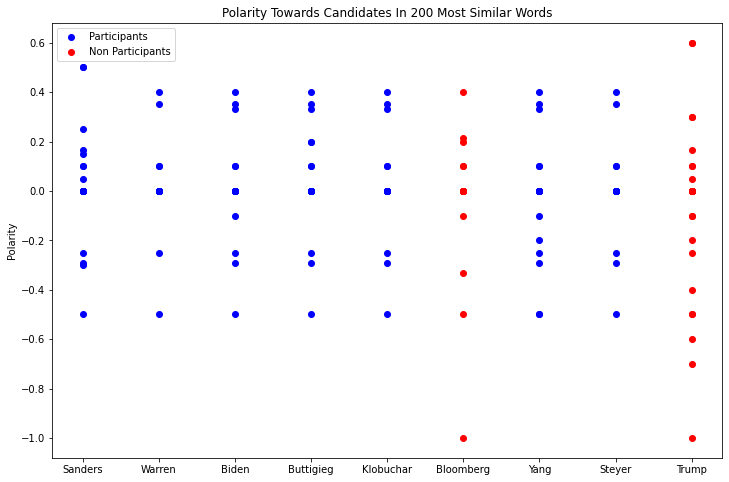

In [0]:
twitter_1 = pd.read_csv('public_database.csv')
twitter_1_sent = get_sim_words_polarity(twitter_1)
scatter_plot(twitter_1_sent, 'Polarity Towards Candidates In 200 Most Similar Words', 'Polarity', d1_participants)

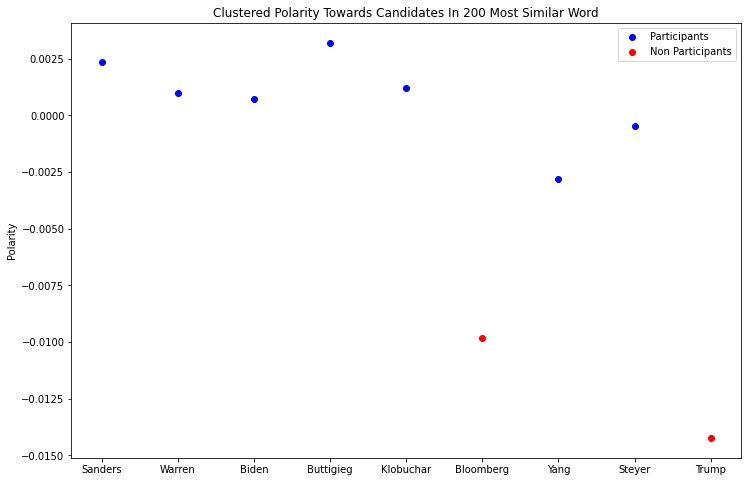

In [0]:
clusters, sent_clusters = lloyds(twitter_1_sent, len(candidate_last_names), 'Clustered Polarity Towards Candidates In 200 Most Similar Word', 'Polarity', d1_participants)

### Transcript

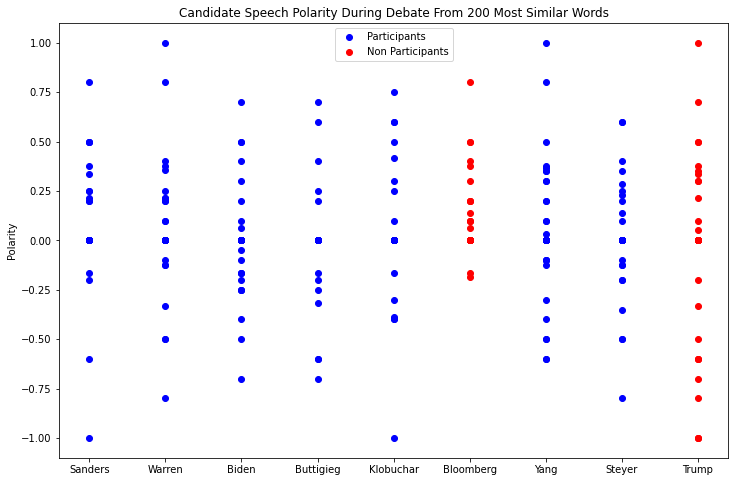

In [130]:
# Remove links to video
for i in range(len(transcript_1)):
  transcript_1[i] = re.sub(r"\(<a .*</a>\)<br/>", '', transcript_1[i].text)
transcript_1 = pd.DataFrame(transcript_1,columns=['text'])

debate_1_sent = get_sim_words_polarity(transcript_1)
cleaned_debate_1_sent = []

titles = ['Sanders', 'Warren', 'Biden', 'Buttigieg', 'Klobuchar', 'Bloomberg', 'Yang', 'Steyer', 'Trump']
new_i = 0
for i in range(len(titles)):
  cand = [[new_i, j[1]] for j in debate_1_sent if j[0] == i]

  if len(cand) == 0:
    if titles[i] in d1_participants:
      d1_participants.remove(titles[i])
    titles.pop(i)
  else:
    new_i += 1
    cleaned_debate_1_sent.extend(cand)

scatter_plot(cleaned_debate_1_sent, 'Candidate Speech Polarity During Debate From 200 Most Similar Words', 'Polarity', d1_participants, titles=titles)

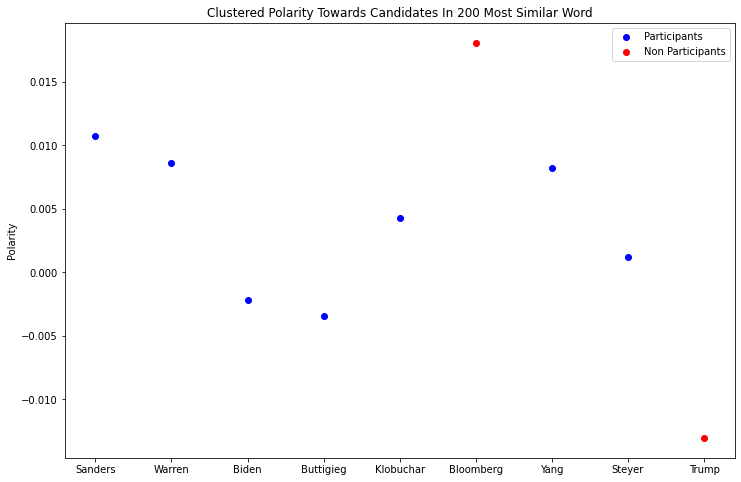

In [131]:
clusters, sent_clusters = lloyds(cleaned_debate_1_sent, len(titles), 'Clustered Polarity Towards Candidates In 200 Most Similar Word', 'Polarity', d1_participants, titles=titles)

## Debate 2

In [0]:
d2_participants = ['Sanders', 'Warren', 'Biden', 'Buttigieg', 'Klobuchar', 'Bloomberg']

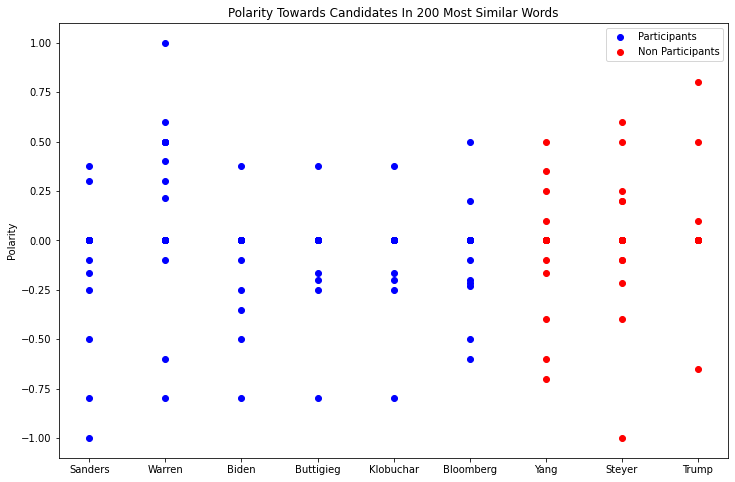

In [0]:
twitter_2 = pd.read_csv('public_database-0220.csv')
twitter_2_sent = get_sim_words_polarity(twitter_2)

scatter_plot(twitter_2_sent, 'Polarity Towards Candidates In 200 Most Similar Words', 'Polarity', d2_participants)

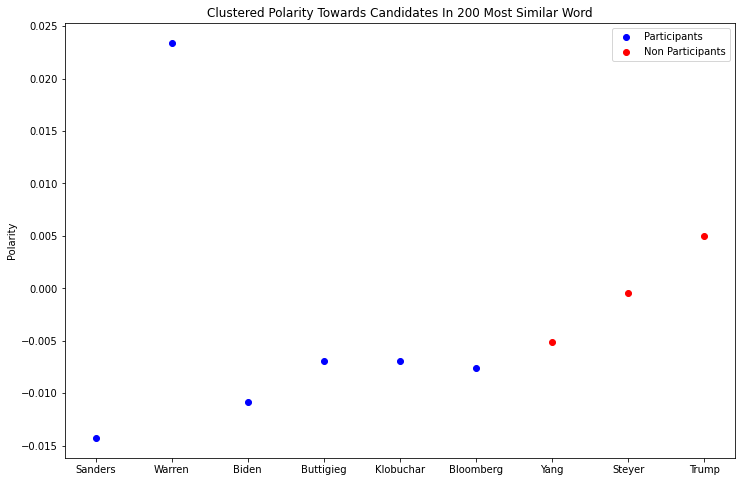

In [0]:
clusters, sent_clusters = lloyds(twitter_2_sent, len(candidate_last_names), 'Clustered Polarity Towards Candidates In 200 Most Similar Word', 'Polarity', d2_participants)

### Transcript

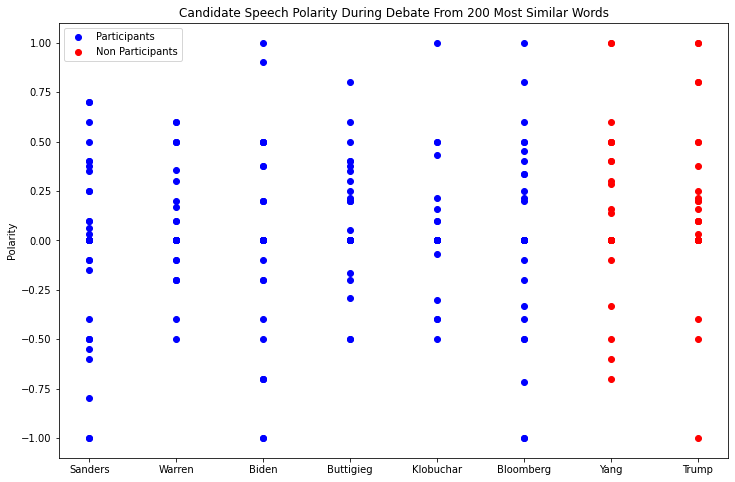

In [127]:
# Remove links to video
for i in range(len(transcript_2)):
  transcript_2[i] = re.sub(r"\(<a .*</a>\)<br/>", '', transcript_2[i].text)
transcript_2 = pd.DataFrame(transcript_2,columns=['text'])

debate_2_sent = get_sim_words_polarity(transcript_2)
cleaned_debate_2_sent = []

titles = ['Sanders', 'Warren', 'Biden', 'Buttigieg', 'Klobuchar', 'Bloomberg', 'Yang', 'Steyer', 'Trump']
new_i = 0
for i in range(len(titles)):
  cand = [[new_i, j[1]] for j in debate_2_sent if j[0] == i]

  if len(cand) == 0:
    if titles[i] in d2_participants:
      d2_participants.remove(titles[i])
    titles.pop(i)
  else:
    new_i += 1
    cleaned_debate_2_sent.extend(cand)

scatter_plot(cleaned_debate_2_sent, 'Candidate Speech Polarity During Debate From 200 Most Similar Words', 'Polarity', d2_participants, titles=titles)

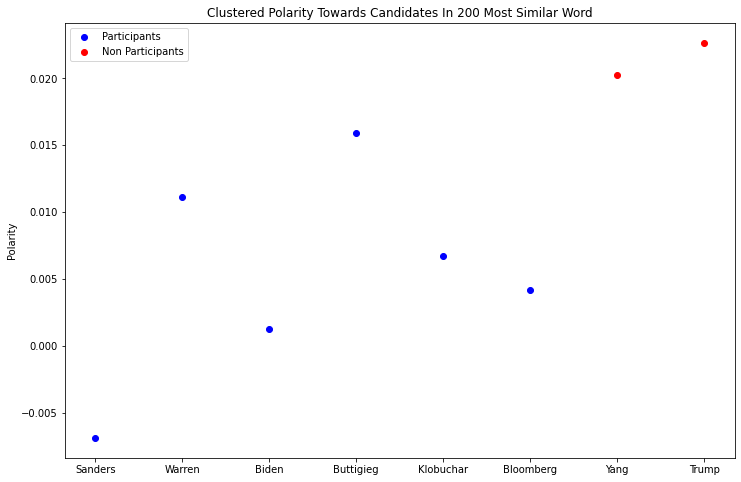

In [128]:
clusters, sent_clusters = lloyds(cleaned_debate_2_sent, len(titles), 'Clustered Polarity Towards Candidates In 200 Most Similar Word', 'Polarity', d2_participants, titles=titles)